In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.9 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.9 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.9 kB 100.9 kB/s eta 0:00:01
     -------------------------- ---


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   -------- ------------------------------- 2.5/10.9 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.5/10.9 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.5/10.9 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.5/10.9 MB 1.2 MB/s eta 0:00:07
   --------- ------------------------------ 2.5/10.9 MB 1.1 MB/s eta 0:00:08
   --------- ------------------------------ 2.5/10.9 MB 1.1 MB/s eta 0:00:08
   --------- ------------------------------ 2.5/10.9 MB 1.1 MB/s eta 0:00:08
   --------- ------------------------------ 2.5/10.9 MB 1.1 MB/s eta 0:00:08
   --------- ------------------------------ 2.5/10.9 MB 1.1 MB/s eta 0:00:08
   --------- ------------------------------ 2.5/10.9 MB 1.1 MB/s eta 0:00:08
   --------- ------------------------------ 2.5/10.9 MB 1.0 MB/s eta 0:00:09
   --------- ------------------------------ 2.7/10.9 MB 1.1 MB/s eta 0:00:08
   --------- ------------------------------ 2.7/10.9 MB 1.1 MB/s eta 0:00:08

In [ ]:
                                    #MOVIE RATING PREDICTION

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

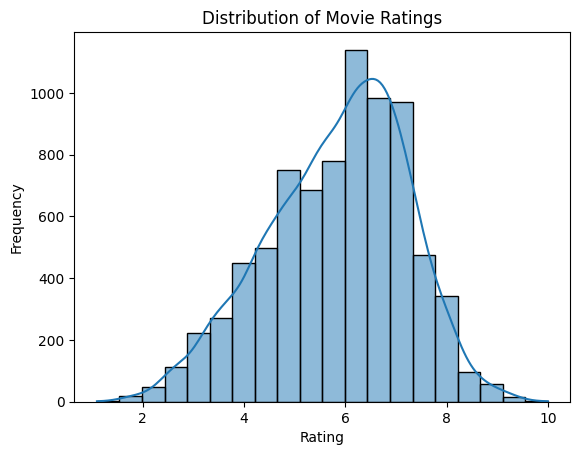

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: '(1996)'

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = 'IMDb Movies India.csv'  # Replace with the path to your dataset
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Step 3: Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())

# Visualize the distribution of ratings
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Step 4: Data Preprocessing
# Handle missing values and encode categorical variables

# Separate features and target variable
X = df.drop(columns=['Rating'])
y = df['Rating']

# Define categorical and numerical columns
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
numerical_cols = ['Year', 'Duration', 'Votes']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Step 5: Model Building
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Evaluation
# Fit the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Root Mean Squared Error:', rmse)

# Step 7: Prediction
# Example prediction
example_data = pd.DataFrame([{
    'Name': 'Example Movie',
    'Year': 2023,
    'Duration': 120,
    'Genre': 'Drama',
    'Votes': 1500,
    'Director': 'Example Director',
    'Actor 1': 'Actor A',
    'Actor 2': 'Actor B',
    'Actor 3': 'Actor C'
}])

example_pred = clf.predict(example_data)
print('Predicted Rating for Example Movie:', example_pred[0])


In [ ]:
                            #CREDIT CARD FRAUD DETECTION

In [2]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

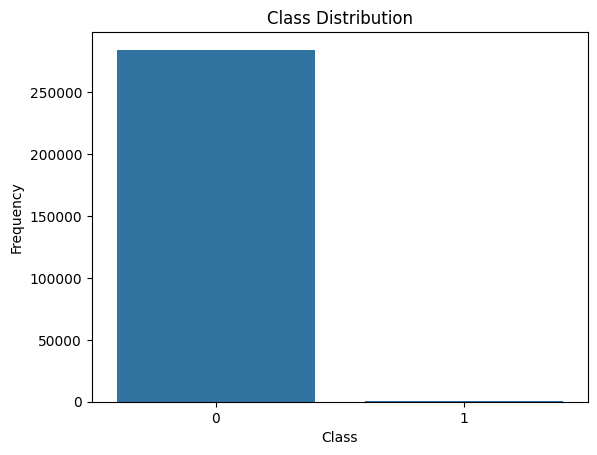

Class
0    284315
1    284315
Name: count, dtype: int64
Logistic Regression:
[[55361  1389]
 [ 4289 52687]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Random Forest Classifier:
[[56738    12]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



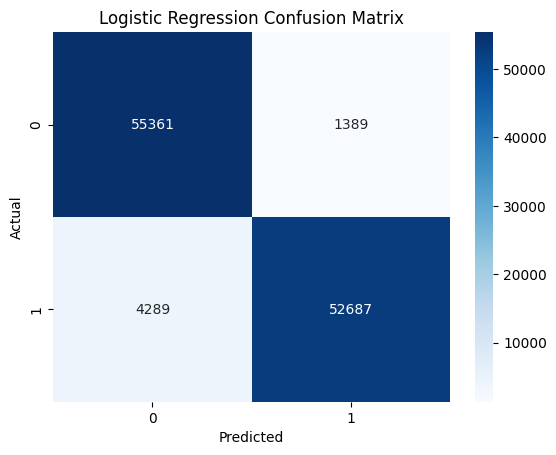

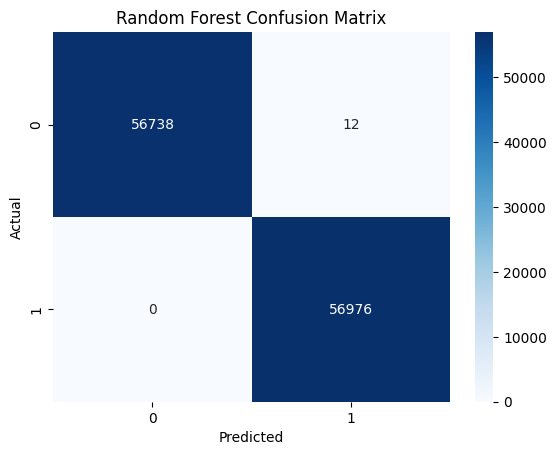

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = 'creditcard.csv'  # Replace with the path to your dataset
df = pd.read_csv(file_path)

# Step 3: Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())

# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Step 4: Data Preprocessing
# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the class distribution after resampling
print(pd.Series(y_resampled).value_counts())

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Model Building and Training

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Step 8: Model Evaluation

# Evaluation function
def evaluate_model(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

# Evaluate Logistic Regression
print("Logistic Regression:")
precision_logreg, recall_logreg, f1_logreg = evaluate_model(y_test, y_pred_logreg)

# Evaluate Random Forest
print("Random Forest Classifier:")
precision_rf, recall_rf, f1_rf = evaluate_model(y_test, y_pred_rf)

# Step 9: Visualize the Results

# Plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Logistic Regression
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression Confusion Matrix')

# Plot for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')


In [ ]:
                                #SALES PREDICTION USING PYTHON

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

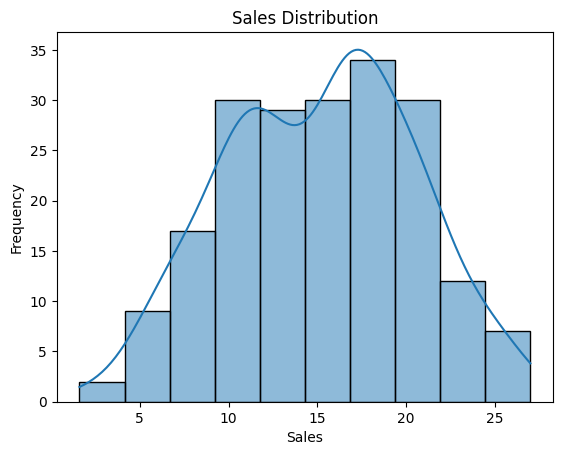

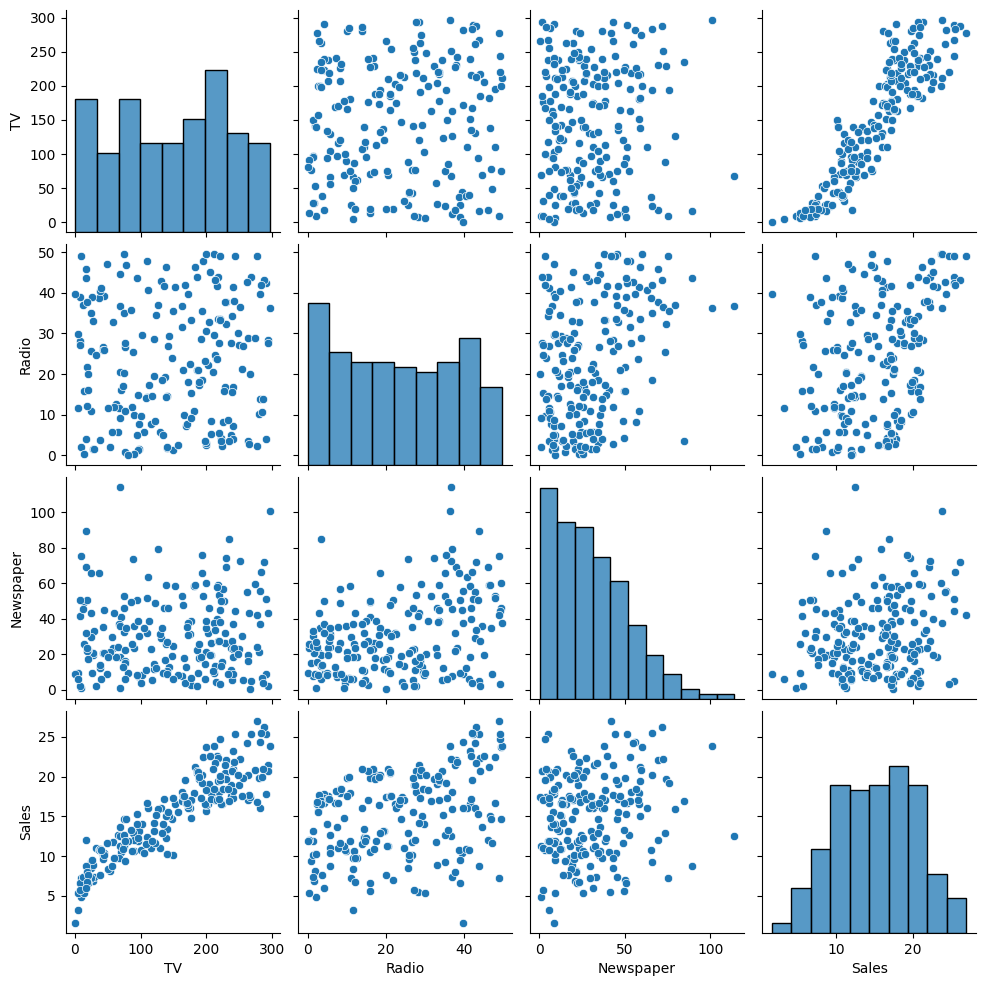

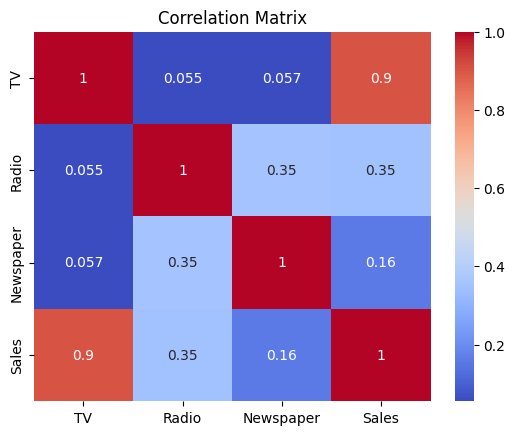

Linear Regression:
MSE: 2.9077569102710923
RMSE: 1.7052146229349232
R2 Score: 0.9059011844150826
Random Forest Regressor:
MSE: 1.436150725000001
RMSE: 1.198395062156049
R2 Score: 0.9535242847342004


C:\Users\Muhammad Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Muhammad Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Muhammad Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Muhammad Ahmad\AppData\Local\Programs\Python\Python

Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validation score:  0.8810378550622124
Best Model:
MSE: 2.926215825000007
RMSE: 1.7106185504080116
R2 Score: 0.905303829798939


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Load the dataset
file_path = 'advertising.csv'  # Replace with the actual path to your dataset
df = pd.read_csv(file_path)

# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Fill missing values if necessary
# Example: df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Separate features and target variable
X = df.drop(columns=['Sales'])  # Assuming 'Sales' is the target variable
y = df['Sales']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Exploratory Data Analysis (EDA)

# Visualize the distribution of the target variable
sns.histplot(y, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Visualize relationships between features and the target variable
sns.pairplot(df)
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Model Building

# Train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict on the test set with Linear Regression
y_pred_lr = model_lr.predict(X_test)

# Train the Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set with Random Forest
y_pred_rf = model_rf.predict(X_test)

# Model Evaluation

# Evaluation function
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R2 Score: {r2}')
    return mse, rmse, r2

# Evaluate Linear Regression
print("Linear Regression:")
mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

# Evaluate Random Forest Regressor
print("Random Forest Regressor:")
mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

# Optimization (Hyperparameter Tuning)

# Example for Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Predict with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("Best Model:")
mse_best, rmse_best, r2_best = evaluate_model(y_test, y_pred_best)
